In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from gensim.models import Word2Vec,KeyedVectors

In [3]:
df =pd.read_csv(r"C:\Users\Abdur rahim nishad\Downloads\train.csv~\train.csv")

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
199728,199728,186062,130104,What are some mind blowing Hover tools that mo...,What are some mind-blowing gadgets tools that ...,0
9514,9514,18476,18477,Is burn data to bluray media can cause loss qu...,Instagram. Can I add locations to my photo map...,0
147983,147983,233427,233428,Did deep learning revolutionize clustering as ...,How do you align text to the edges of an image...,0
286539,286539,407144,407145,What are the NBFCs?,Are there any NBFCs in the US?,0
43336,43336,77964,77965,How many kms to walk to lose 6-7 kgs in a month?,I am 5'2 and I weigh 70 kgs. I gained 7 kgs in...,0
309373,309373,433346,158679,How do I get a knight journalism fellowship at...,My IQ is 84. How can I get into Stanford?,0
25766,25766,48008,48009,What is the Latest notification from BRO?,What are the best websites for mechanical engi...,0
388331,388331,147453,520708,"If everyone can read each other's thoughts, wh...",What would the world be like if everyone could...,1
162643,162643,73604,86789,Why some people commit suicide?,Why do peope commit suicide?,1
47674,47674,85090,85091,How do I make myself stand out as a prospectiv...,How difficult is it to be admitted to Berkeley...,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [11]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [13]:
df.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

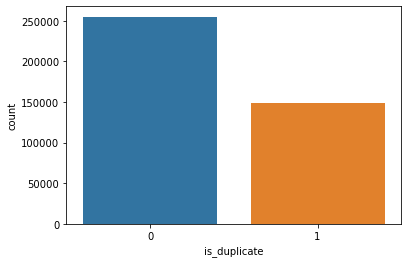

In [18]:
sns.countplot(x=df.is_duplicate)
plt.show()

In [38]:
#repeated questions
qid=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
print("number of unique questions",np.unique(qid).shape[0])

number of unique questions 537933


0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64